<h1 id="hierarchical_agglomerative">Clustering hiérarchique - Agglomération</h1>

Nous examinerons une technique de clustering, qui est le <b>clustering hiérarchique agglomératif</b>.
<br>
Nous utiliserons également le lien complet comme critère de lien. <br>

In [1]:
%matplotlib inline

In [99]:
import numpy as np 
import pandas as pd 
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix 
from sklearn.cluster import AgglomerativeClustering 
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs 

<hr>
<h3 id="generating_data">Génération de données aléatoires</h3>

Nous allons générer un ensemble de données à l'aide de la classe <b>make_blobs</b>. <br> 
<ul>
    <li> <b>n_échantillons</b> : le nombre total de points répartis également entre les groupes. </li>
    <li> <b>centres</b> : le nombre de centres à générer ou les emplacements fixes des centres. </li>
    <li> <b>cluster_std</b> : l'écart type des clusters. Plus le nombre est grand, plus les clusters sont éloignés</li>
</ul> <br>

In [157]:
X1, y1 = make_blobs(n_samples=50, centers=4, random_state = 123, cluster_std=1.9)

* Le nuage de points des données générées aléatoirement.

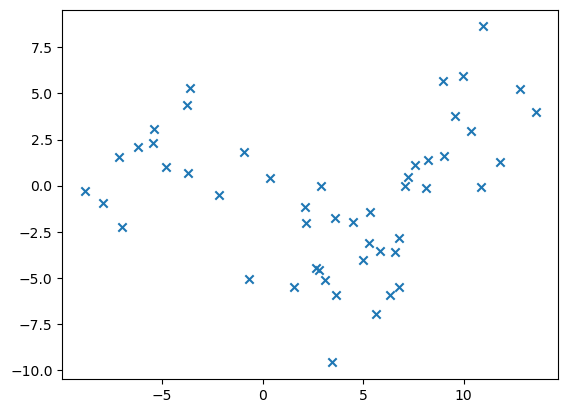

In [158]:
plt.scatter(X1[:, 0], X1[:, 1], marker='x') 

<hr>
<h3 id="agglomerative_clustering">Clustering agglomératif</h3>

<ul>
    <li> <b>n_clusters</b> : le nombre de clusters à former ainsi que le nombre de centroïdes à générer. </li>
    <li> <b>liaison</b> : quel critère de liaison utiliser. Le critère de liaison détermine la distance à utiliser entre les ensembles d'observations. L'algorithme va fusionner les paires de cluster qui minimisent ce critère. </li>
</ul> 

In [159]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [160]:
agglom.fit(X1)

AgglomerativeClustering(linkage='average', n_clusters=4)

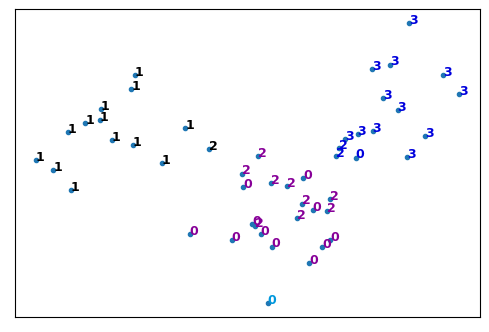

In [161]:
plt.figure(figsize=(6,4))

# Cette boucle affiche tous les points de données.
for i in range(X1.shape[0]):
    # Remplacez les points de données par leur valeur de cluster respective
    # (ex. 0) et est codé par couleur avec une palette de couleurs (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Supprimez les graduations x, les graduations y, les axes x et y
plt.xticks([])
plt.yticks([])
# plt.axis('off')

# Afficher le tracé des données d'origine avant le regroupement
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

<h3 id="dendrogram">Dendrogramme associé pour le clustering hiérarchique agglomératif</h3>

<b>Une matrice de distance</b> contient la <b> distance de chaque point à tous les autres points d'un jeu de données </b>.


In [162]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[ 0.          6.25402068  4.71845943 ...  9.60130456  2.15755963
   9.33498382]
 [ 6.25402068  0.          4.82443342 ...  3.35178563  4.77003724
  13.79734114]
 [ 4.71845943  4.82443342  0.         ...  7.58419543  5.14187886
  14.03068867]
 ...
 [ 9.60130456  3.35178563  7.58419543 ...  0.          8.00023039
  16.56414699]
 [ 2.15755963  4.77003724  5.14187886 ...  8.00023039  0.
   9.37539132]
 [ 9.33498382 13.79734114 14.03068867 ... 16.56414699  9.37539132
   0.        ]]


A l'aide de la classe <b>linking </b> de la hiérarchie, transmission les paramètres :

<ul>
    <li> La matrice de distance </li>
    <li> 'complete' pour une liaison complète </li>
</ul> 

In [163]:
Z = hierarchy.linkage(dist_matrix, 'average')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8264\2305343628.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


* Un regroupement hiérarchique est généralement visualisé sous la forme d'un dendrogramme, comme indiqué dans la cellule suivante. Chaque fusion est représentée par une ligne horizontale. La coordonnée y de la ligne horizontale est la similarité des deux clusters qui ont été fusionnés, où les villes sont considérées comme des clusters singleton.
* En remontant de la couche inférieure au nœud supérieur, un dendrogramme nous permet de reconstruire l'historique des fusions qui ont abouti au regroupement représenté.

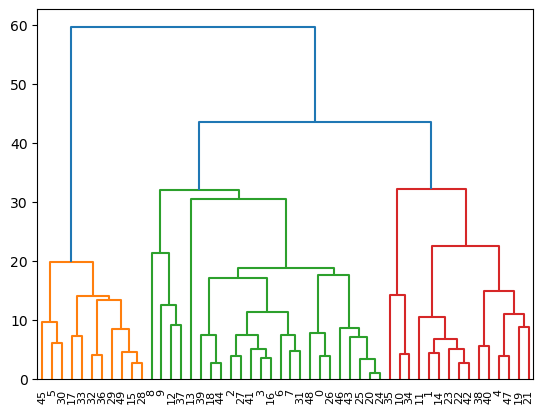

In [164]:
dendro = hierarchy.dendrogram(Z)

[0 2 2 2 0 1 2 0 0 0 1 1 1 1 3 1 1 3 3 1 1 0 2 1 0 3 2 1 2 2 2 2 0 2 1 1 1
 1 1 3 1 1 3 3 2 0 1 0 1 1 0 3 0 3 0 0 0 2 2 2 1 1 2 0 3 2 2 3 3 2 0 1 1 1
 0 2 3 2 3 2 1 1 1 2 0 2 0 3 1 2 3 3 2 1 0 0 3 3 1 2 3 2 0 3 1 0 3 1 0 2 2
 1 3 1 0 1 1 1 1 2 3 0 0 3 0 2 1 0 1 2 2 2 0 2 3 1 1 2 1 1 2 0 0 3 3 1 3 2
 0 0 0 0 2 3 0 0 1 0 2 0 2 0 3 0 2 0 0 3 0 2 0 1 2 1 0 0 1 3 1 1 0 0 0 0 2
 2 0 0 1 0 2 3 1 1 1 3 1 2 0 2 0 2 1 3 0 3 1 1 0 1 1 2 1 2 0 2 0 0 2 3 2 3
 2 0 1 3 3 2 2 3 2 0 1 0 3 0 0 3 2 3 3 3 2 0 0 1 3 0 0 1 1 0 1 0 3 1 1 3 3
 1 1 1 1 0 3 1 2 2 1 1 0 1 0 1 3 2 1 3 2 0 3 3 1 3 0 0 0 2 0 1 1 3 2 2 1 3
 0 2 3 0 3 1 0 2 1 2 2 2 3 2 1 1 2 3 2 3 1 1 1 1 1 1 3 1 0 0 1 2 1 0 2 0 1
 1 1 3 1 0 1 2 3 1 1 0 3 2 0 3 1 3 0 3 0 0 1 3 3 3 1 0 0 3 2 1 3 1 0 0 2 1
 1 0 1 1 3 1 3 3 1 1 0 3 1 3 0 1 3 3 2 1 1 1 2 2 3 1 1 2 3 2 3 1 2 0 3 1 1
 0 1 3 0 0 3 1 3 1 0 0 0 1 3 2 3 2 1 2 2 1 2 2 0 1 0 2 0 1 2 0 0 3 0 0 1 0
 1 1 0 0 0 2 2 1 1 3 0 2 0 2 0 3 1 1 0 0 0 2 1 2 2 3 1 0 0 3 3 3 2 0 2 1 0
 0 1 2 2 1 0 1 2 2 0 0 1 

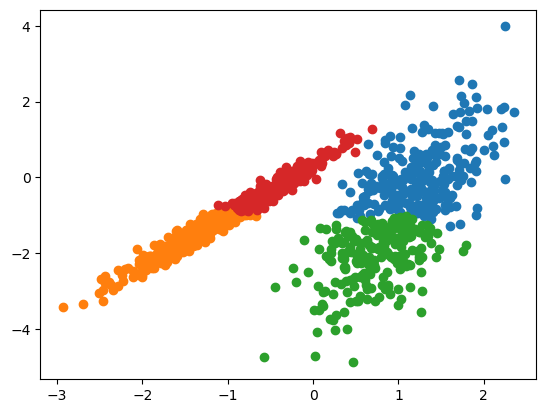

In [166]:
from numpy import where
from numpy import unique
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plot

# Initializing data
train_data, _ = make_classification(n_samples=1000,
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

agg_mdl = AgglomerativeClustering(n_clusters=4)

# each data point assigned to cluster
agg_result = agg_mdl.fit_predict(train_data)
# print(agg_result)
# Obtain all clusters which are unique
agg_clusters = unique(agg_result)

# plot clusters
for agg_cluster in agg_clusters:
    # fetch data point that fall in this clstr
    index = where(agg_result == agg_cluster)

    plot.scatter(train_data[index, 0], train_data[index,1])

# Agglomerative hierarchy plot
plot.show()